In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame analyses
from src.DataFrameAnalyses import DataFramePlotGenerator

# Simulation
from src.simulation.ProductionSimulation import ProductionSimulation

pd.set_option('display.min_rows', 21)
pd.set_option('display.max_rows', 25)


In [2]:
from decimal import Decimal
from src.domain.Collection import LiveJobCollection
from src.domain.Query import JobQuery
from src.DataFrameEnrichment import DataFrameEnrichment

In [3]:
source_name= "Fisher and Thompson 10x10"
max_bottleneck_utilization=Decimal("0.85")

# I. Deadlines

In [4]:
jobs = JobQuery.get_by_source_name_and_max_bottleneck_utilization(
    source_name=source_name,
    max_bottleneck_utilization=max_bottleneck_utilization
)

# Collection with jobs
jobs_collection = LiveJobCollection(jobs)
jobs_collection.to_jobs_dataframe()

,Job,Routing_ID,Arrival,Ready Time,Due Date
0,01-08500-0000,01-07,0,1440,2746
1,01-08500-0001,01-06,53,1440,2759
2,01-08500-0002,01-01,125,1440,2835
3,01-08500-0003,01-05,174,1440,3912
4,01-08500-0004,01-04,219,1440,3628
5,01-08500-0005,01-02,443,1440,3168
6,01-08500-0006,01-00,753,1440,3570
7,01-08500-0007,01-03,896,1440,3379
8,01-08500-0008,01-09,962,1440,2689
9,01-08500-0009,01-08,979,1440,3402


## A) Simulation

In [5]:
simulation = ProductionSimulation(sigma = 0, verbose = False, with_earliest_start=True)
simulation.run(jobs_collection, start_time = 0, end_time = None)

In [6]:
finished_operations = simulation.get_finished_operation_collection()
df_fcfs = finished_operations.to_operations_dataframe()
df_fcfs


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Arrival,Ready Time,Due Date
0,01-08500-0000,01-07,0,M02,1440.0,31.0,1471.0,0,1440,2746
1,01-08500-0000,01-07,1,M00,1707.0,86.0,1793.0,0,1440,2746
2,01-08500-0000,01-07,2,M01,2183.0,46.0,2229.0,0,1440,2746
3,01-08500-0000,01-07,3,M05,2272.0,74.0,2346.0,0,1440,2746
4,01-08500-0000,01-07,4,M04,2346.0,32.0,2378.0,0,1440,2746
5,01-08500-0000,01-07,5,M06,2379.0,88.0,2467.0,0,1440,2746
6,01-08500-0000,01-07,6,M08,2619.0,19.0,2638.0,0,1440,2746
7,01-08500-0000,01-07,7,M09,2638.0,48.0,2686.0,0,1440,2746
8,01-08500-0000,01-07,8,M07,2851.0,36.0,2887.0,0,1440,2746
9,01-08500-0000,01-07,9,M03,2887.0,79.0,2966.0,0,1440,2746


In [7]:
#if day_count <= 5:
#    gantt.get_plot(df_fcfs_execution, perspective="Machine")

In [8]:
df_jobs_times_temp = finished_operations.to_jobs_metrics_dataframe()
df_jobs_times_temp


,Job,Routing_ID,Last Operation,End,Arrival,Ready Time,Due Date,Total Processing Time,Flowtime,Lateness,Tardiness,Earliness
0,01-08500-0000,01-07,9,2966.0,0,1440,2746,539.0,1526.0,220.0,220.0,0.0
1,01-08500-0002,01-01,9,2720.0,125,1440,2835,510.0,1280.0,-115.0,0.0,115.0
2,01-08500-0001,01-06,9,2165.0,53,1440,2759,416.0,725.0,-594.0,0.0,594.0
3,01-08500-0006,01-00,9,2550.0,753,1440,3570,395.0,1110.0,-1020.0,0.0,1020.0
4,01-08500-0003,01-05,9,2924.0,174,1440,3912,496.0,1484.0,-988.0,0.0,988.0
5,01-08500-0004,01-04,9,3098.0,219,1440,3628,393.0,1658.0,-530.0,0.0,530.0
6,01-08500-0005,01-02,9,2661.0,443,1440,3168,568.0,1221.0,-507.0,0.0,507.0
7,01-08500-0013,01-04,9,3215.0,1178,1440,3300,393.0,1775.0,-85.0,0.0,85.0
8,01-08500-0009,01-08,9,2995.0,979,1440,3402,597.0,1555.0,-407.0,0.0,407.0
9,01-08500-0007,01-03,9,2772.0,896,1440,3379,655.0,1332.0,-607.0,0.0,607.0


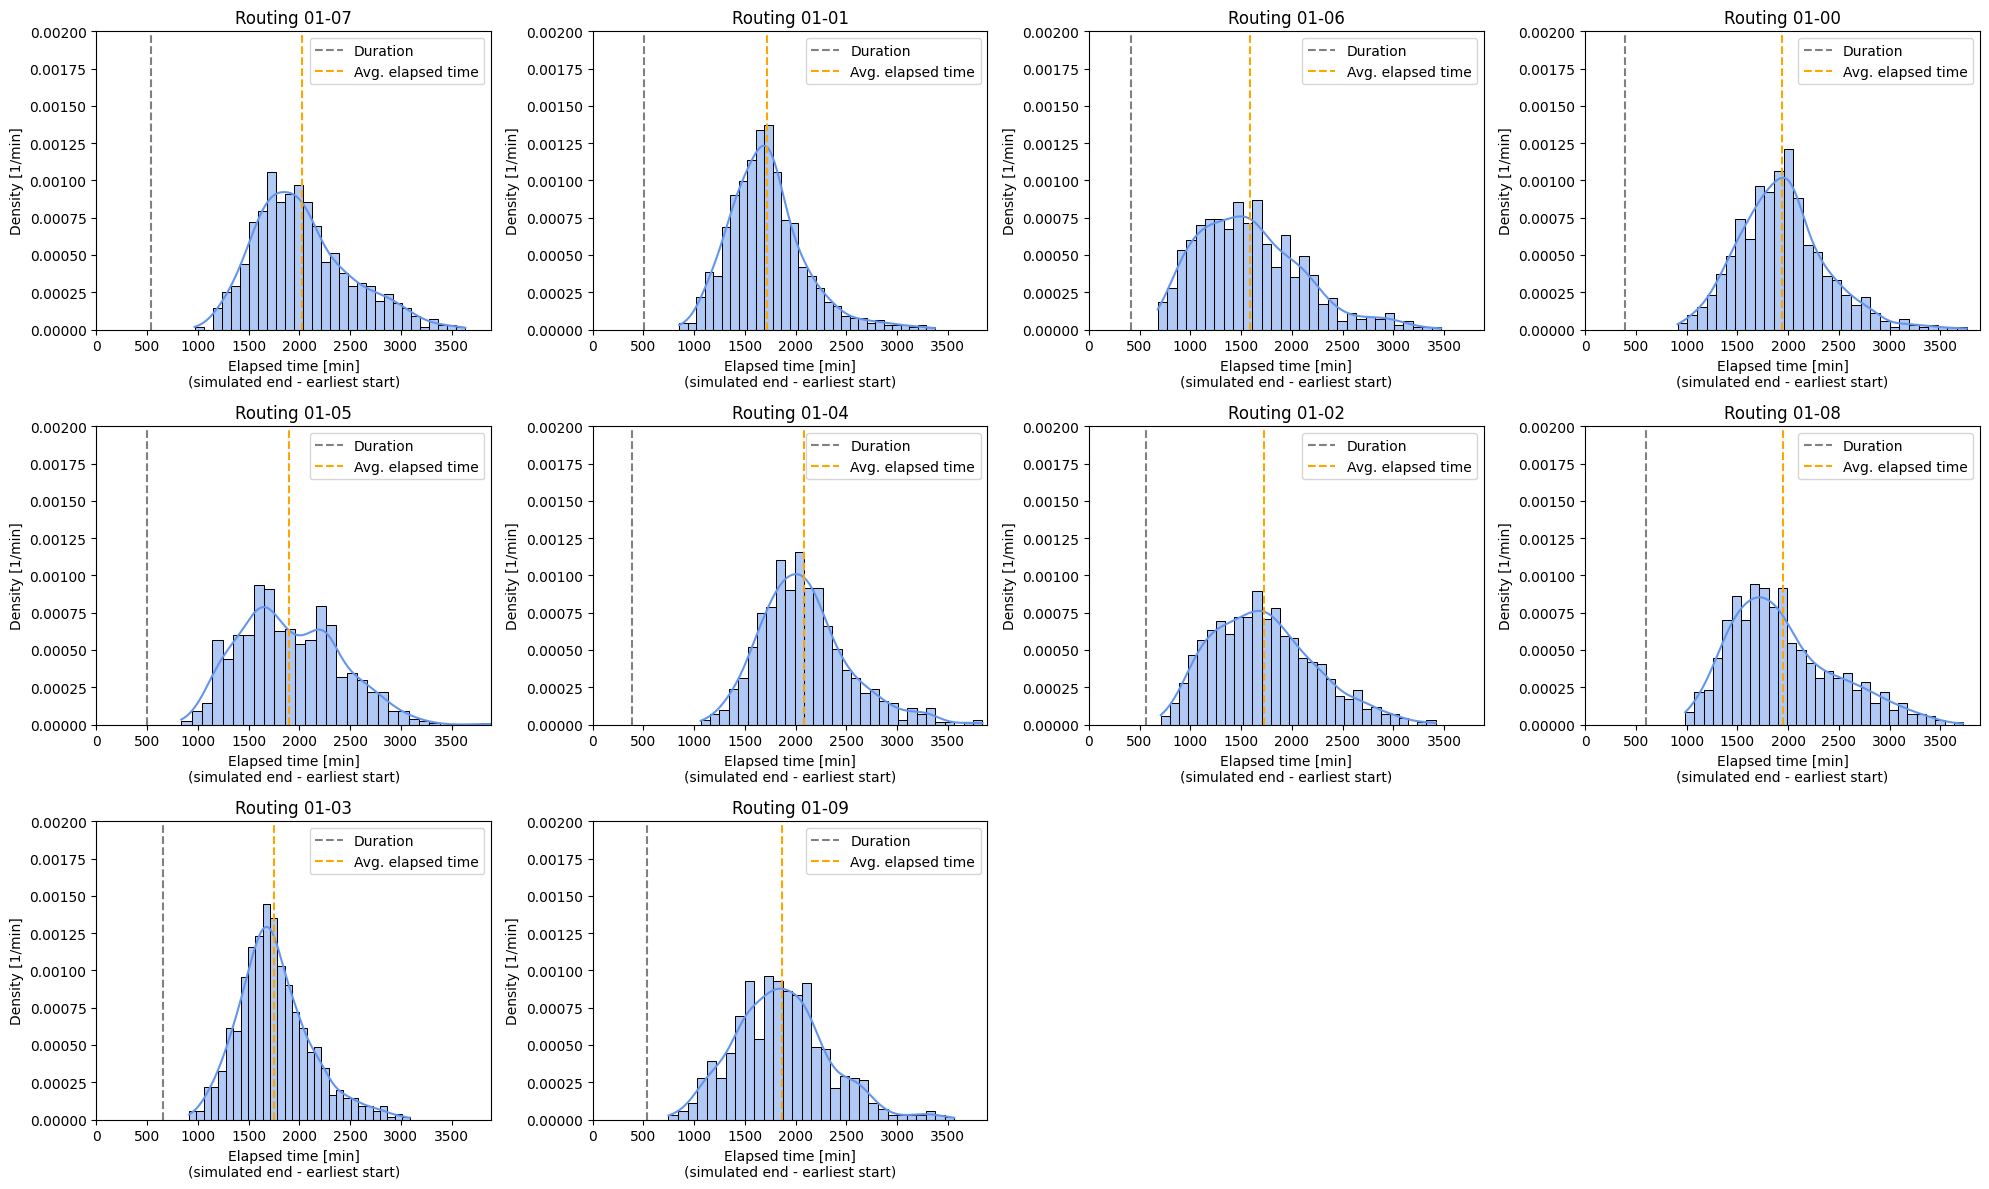

In [9]:
#DataFramePlotGenerator.get_scheduling_window_density_plot_figure(df_jobs_times_temp, due_date_column="End", y_max=0.0015)
DataFramePlotGenerator.get_elapsed_time_density_plot_figure(df_jobs_times_temp)
plt.show()

## B) Generation of deadlines using log-normal distribution

In [10]:
df_jobs_times = DataFrameEnrichment.add_groupwise_lognormal_due_dates_by_group_mean(df_jobs_times_temp, sigma=0.25)
df_jobs_times

,Job,Routing_ID,Last Operation,End,Arrival,Ready Time,Due Date,Total Processing Time,Flowtime,Lateness,Tardiness,Earliness
0,01-08500-0000,01-07,9,2966.0,0,1440,2746.0,539.0,1526.0,220.0,220.0,0.0
1,01-08500-0002,01-01,9,2720.0,125,1440,2835.0,510.0,1280.0,-115.0,0.0,115.0
2,01-08500-0001,01-06,9,2165.0,53,1440,2759.0,416.0,725.0,-594.0,0.0,594.0
3,01-08500-0006,01-00,9,2550.0,753,1440,3570.0,395.0,1110.0,-1020.0,0.0,1020.0
4,01-08500-0003,01-05,9,2924.0,174,1440,3912.0,496.0,1484.0,-988.0,0.0,988.0
5,01-08500-0004,01-04,9,3098.0,219,1440,3628.0,393.0,1658.0,-530.0,0.0,530.0
6,01-08500-0005,01-02,9,2661.0,443,1440,3168.0,568.0,1221.0,-507.0,0.0,507.0
7,01-08500-0013,01-04,9,3215.0,1178,1440,3300.0,393.0,1775.0,-85.0,0.0,85.0
8,01-08500-0009,01-08,9,2995.0,979,1440,3402.0,597.0,1555.0,-407.0,0.0,407.0
9,01-08500-0007,01-03,9,2772.0,896,1440,3379.0,655.0,1332.0,-607.0,0.0,607.0


####  Plot of the new deadlines

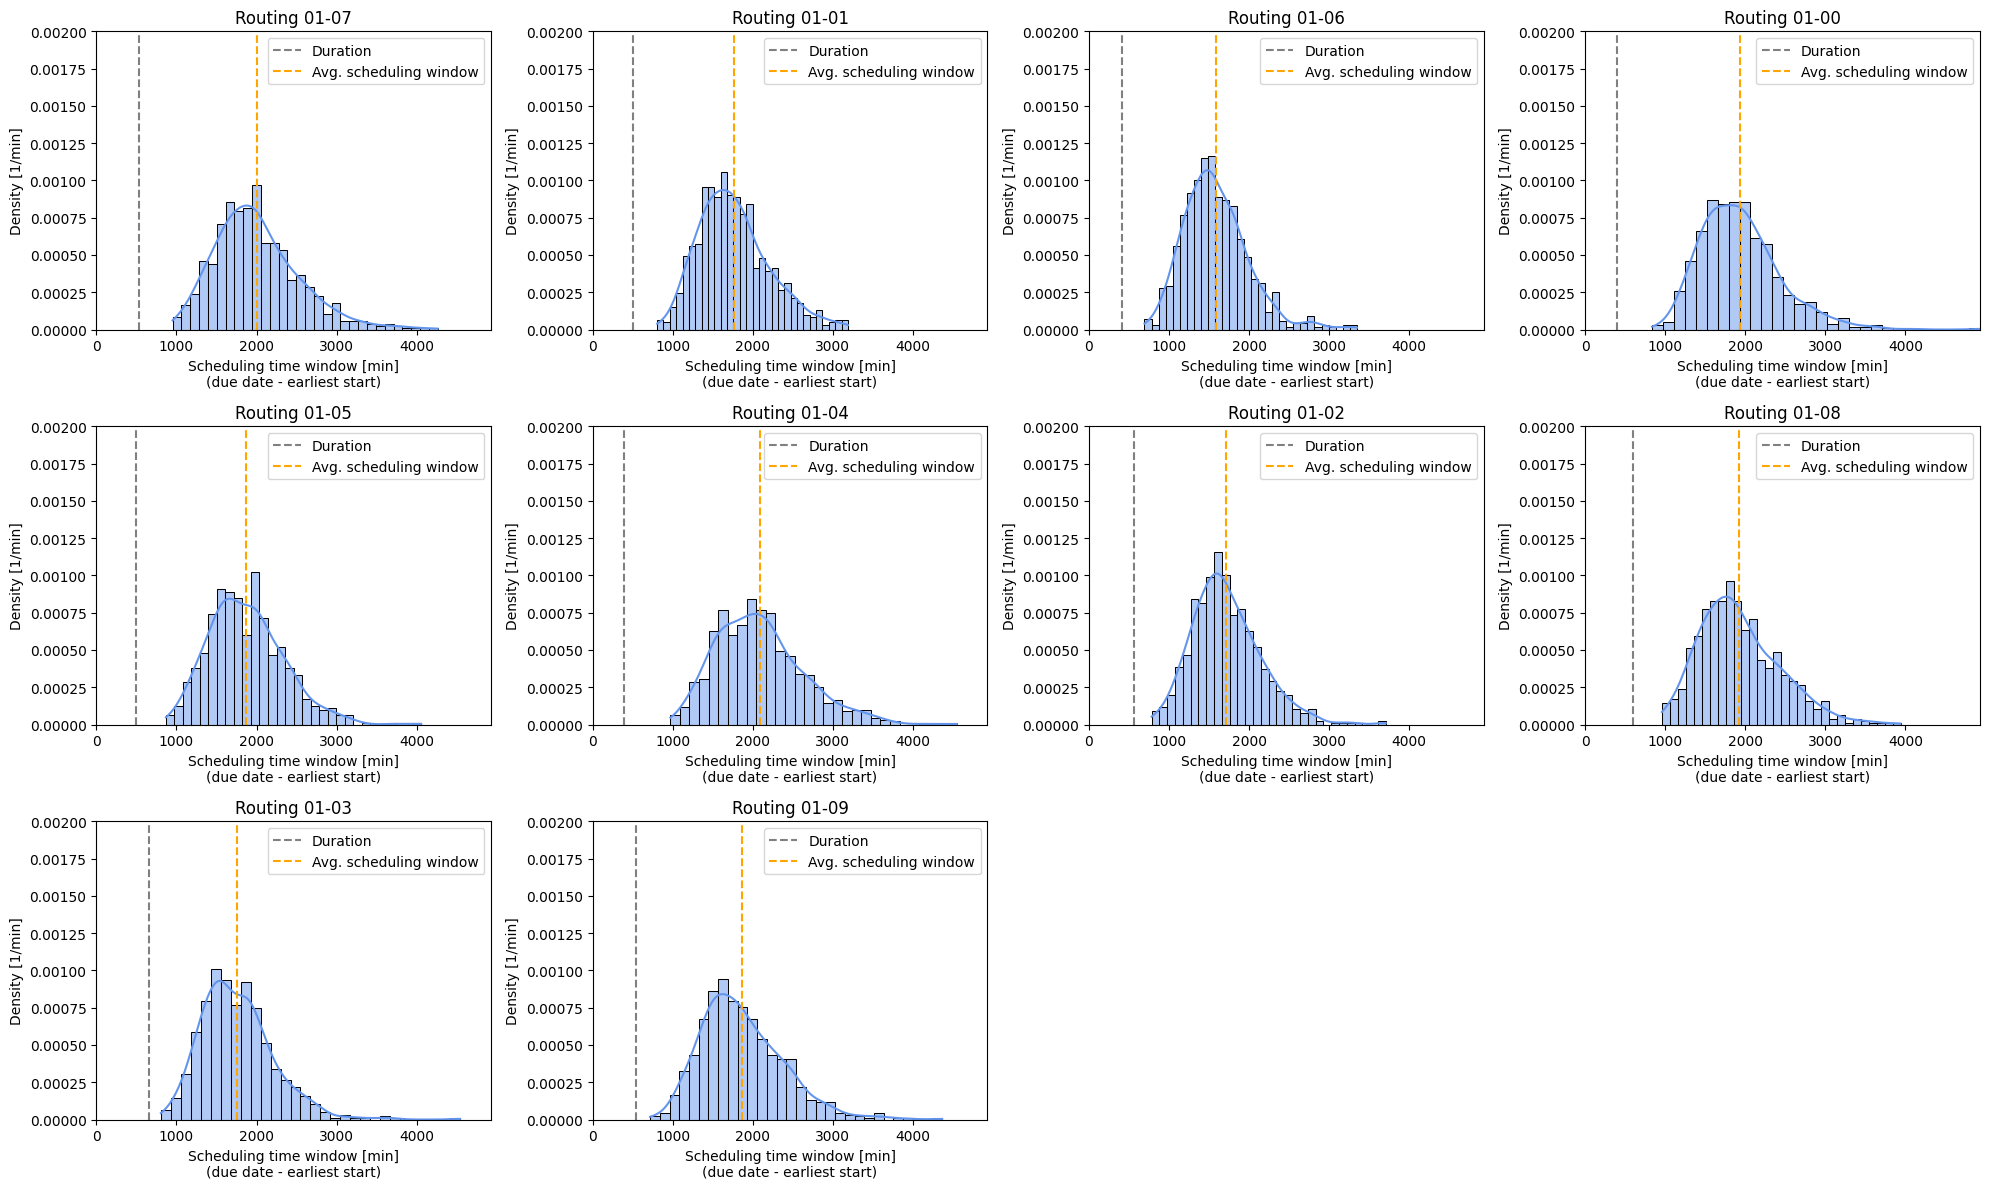

In [11]:
#DataFramePlotGenerator.get_scheduling_window_density_plot_figure(df_jobs_times, y_max=0.0015)
DataFramePlotGenerator.get_scheduling_window_density_plot_figure(df_jobs_times)
plt.show()

#### Ensuring that the processing time is achievable to a certain extent in the best-case scenario

In [12]:
# min. 100 % of processing time for each job is covered in best-case
df_jobs_times_final = DataFrameEnrichment.ensure_reasonable_due_dates(df_jobs_times, min_coverage = 1.0)

diff_count = (df_jobs_times_final["Due Date"] > df_jobs_times["Due Date"]).sum()

# Info: Compare the "Due Date" column
print(f"Number of different entries in 'Due Date': {diff_count}")

df_jobs_times_final

Number of different entries in 'Due Date': 0


,Job,Routing_ID,Last Operation,Arrival,Ready Time,Due Date,Total Processing Time,Flowtime,Lateness,Tardiness,Earliness
0,01-08500-0000,01-07,9,0,1440,2746,539.0,1526.0,220.0,220.0,0.0
1,01-08500-0002,01-01,9,125,1440,2835,510.0,1280.0,-115.0,0.0,115.0
2,01-08500-0001,01-06,9,53,1440,2759,416.0,725.0,-594.0,0.0,594.0
3,01-08500-0006,01-00,9,753,1440,3570,395.0,1110.0,-1020.0,0.0,1020.0
4,01-08500-0003,01-05,9,174,1440,3912,496.0,1484.0,-988.0,0.0,988.0
5,01-08500-0004,01-04,9,219,1440,3628,393.0,1658.0,-530.0,0.0,530.0
6,01-08500-0005,01-02,9,443,1440,3168,568.0,1221.0,-507.0,0.0,507.0
7,01-08500-0013,01-04,9,1178,1440,3300,393.0,1775.0,-85.0,0.0,85.0
8,01-08500-0009,01-08,9,979,1440,3402,597.0,1555.0,-407.0,0.0,407.0
9,01-08500-0007,01-03,9,896,1440,3379,655.0,1332.0,-607.0,0.0,607.0


# II. Transition Times

In [13]:
df_fcfs

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Arrival,Ready Time,Due Date
0,01-08500-0000,01-07,0,M02,1440.0,31.0,1471.0,0,1440,2746
1,01-08500-0000,01-07,1,M00,1707.0,86.0,1793.0,0,1440,2746
2,01-08500-0000,01-07,2,M01,2183.0,46.0,2229.0,0,1440,2746
3,01-08500-0000,01-07,3,M05,2272.0,74.0,2346.0,0,1440,2746
4,01-08500-0000,01-07,4,M04,2346.0,32.0,2378.0,0,1440,2746
5,01-08500-0000,01-07,5,M06,2379.0,88.0,2467.0,0,1440,2746
6,01-08500-0000,01-07,6,M08,2619.0,19.0,2638.0,0,1440,2746
7,01-08500-0000,01-07,7,M09,2638.0,48.0,2686.0,0,1440,2746
8,01-08500-0000,01-07,8,M07,2851.0,36.0,2887.0,0,1440,2746
9,01-08500-0000,01-07,9,M03,2887.0,79.0,2966.0,0,1440,2746


In [14]:
# noinspection PyProtectedMember
df_transition_times = DataFrameEnrichment._compute_transition_times_per_job_operation_backward(df_fcfs)
df_transition_times

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Arrival,Ready Time,Due Date,End_Previous_Operation,Transition Time
9,01-08500-0000,01-07,9,M03,2887.0,79.0,2966.0,0,1440,2746,2887.0,0.0
8,01-08500-0000,01-07,8,M07,2851.0,36.0,2887.0,0,1440,2746,2686.0,165.0
7,01-08500-0000,01-07,7,M09,2638.0,48.0,2686.0,0,1440,2746,2638.0,0.0
6,01-08500-0000,01-07,6,M08,2619.0,19.0,2638.0,0,1440,2746,2467.0,152.0
5,01-08500-0000,01-07,5,M06,2379.0,88.0,2467.0,0,1440,2746,2378.0,1.0
4,01-08500-0000,01-07,4,M04,2346.0,32.0,2378.0,0,1440,2746,2346.0,0.0
3,01-08500-0000,01-07,3,M05,2272.0,74.0,2346.0,0,1440,2746,2229.0,43.0
2,01-08500-0000,01-07,2,M01,2183.0,46.0,2229.0,0,1440,2746,1793.0,390.0
1,01-08500-0000,01-07,1,M00,1707.0,86.0,1793.0,0,1440,2746,1471.0,236.0
0,01-08500-0000,01-07,0,M02,1440.0,31.0,1471.0,0,1440,2746,NaN,NaN


In [15]:
df_avg_transition_times = DataFrameEnrichment.compute_avg_transition_times_per_machine_backward(df_fcfs)
df_avg_transition_times

,Machine,Ø Transition Time
0,M00,229
1,M01,496
2,M02,128
3,M03,202
4,M04,61
5,M05,94
6,M06,53
7,M07,101
8,M08,72
9,M09,24
